<a href="https://colab.research.google.com/github/Asigen93/Prediksi_Hujan_Kota_Sorong_2025-/blob/main/Prediksi_Hujan_Kota_Sorong_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

# 1. Load dan gabungkan semua CSV

In [2]:
files = ["data/2021.csv", "data/2022.csv", "data/2023.csv", "data/2024.csv"]

df_list = []
for file in files:
    year = file.split("/")[-1].split(".")[0]  # Contoh: "2021"
    df = pd.read_csv(file)
    df["Tahun"] = int(year)
    df_list.append(df)

df_all = pd.concat(df_list, ignore_index=True)

# 2. Preprocessing: Buat kolom tanggal lengkap (yyyy-mm-01)

In [4]:
bulan_mapping = {
    "Januari": 1,
    "Februari": 2,
    "Maret": 3,
    "April": 4,
    "Mei": 5,
    "Juni": 6,
    "Juli": 7,
    "Agustus": 8,
    "September": 9,
    "Oktober": 10,
    "November": 11,
    "Desember": 12
}

# Split the 'Bulan;CurahHujan' column into 'Bulan' and 'CurahHujan'
df_all[['Bulan', 'CurahHujan']] = df_all['Bulan;CurahHujan'].str.split(';', expand=True)

df_all["BulanNum"] = df_all["Bulan"].map(bulan_mapping)
df_all["Tanggal"] = pd.to_datetime(df_all["Tahun"].astype(str) + "-" + df_all["BulanNum"].astype(str) + "-01")

# Convert 'CurahHujan' to numeric, coercing errors
df_all['CurahHujan'] = pd.to_numeric(df_all['CurahHujan'], errors='coerce')

# 3. Siapkan data sesuai format Prophet (ds = tanggal, y = curah hujan)

In [5]:
df_prophet = df_all[["Tanggal", "CurahHujan"]].rename(columns={"Tanggal": "ds", "CurahHujan": "y"})

# 4. Buat dan latih model Prophet

In [6]:
model = Prophet(yearly_seasonality=True, weekly_seasonality=False, daily_seasonality=False)
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmpr5chivxg/6sj8zbrz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpr5chivxg/e5dtbad2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32697', 'data', 'file=/tmp/tmpr5chivxg/6sj8zbrz.json', 'init=/tmp/tmpr5chivxg/e5dtbad2.json', 'output', 'file=/tmp/tmpr5chivxg/prophet_modelkmbf3uk0/prophet_model-20250627121805.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
12:18:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:18:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


# 5. Buat future dataframe untuk 12 bulan ke depan (2025)

In [7]:
future = model.make_future_dataframe(periods=12, freq="M")

/usr/local/lib/python3.11/dist-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


# 6. Prediksi

In [8]:
forecast = model.predict(future)

# 7. Visualisasi

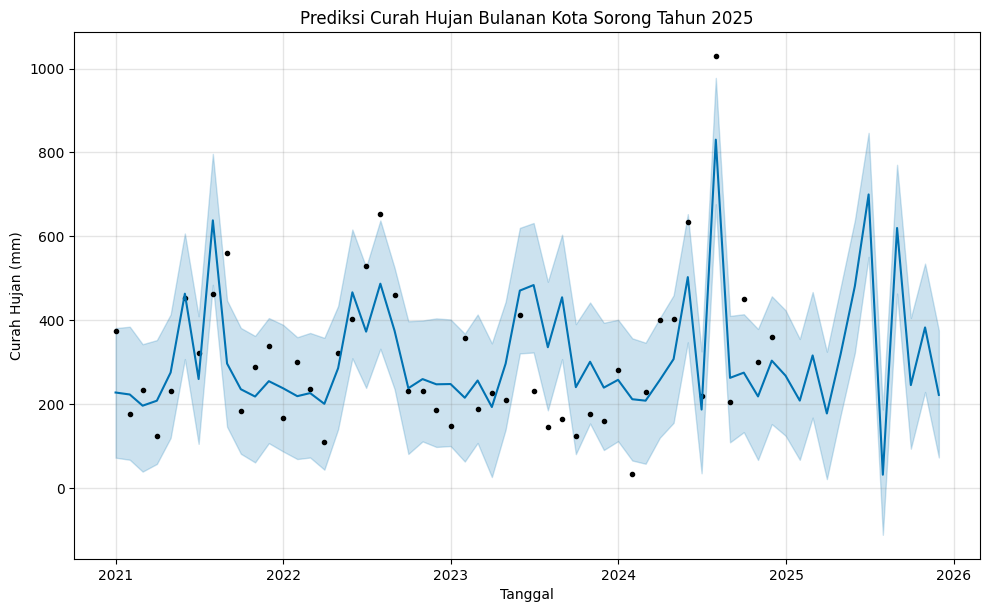

In [9]:
fig1 = model.plot(forecast)
plt.title("Prediksi Curah Hujan Bulanan Kota Sorong Tahun 2025")
plt.xlabel("Tanggal")
plt.ylabel("Curah Hujan (mm)")
plt.show()

# 8. Tampilkan tabel prediksi hanya untuk tahun 2025

In [10]:
pred_2025 = forecast[forecast["ds"].dt.year == 2025][["ds", "yhat", "yhat_lower", "yhat_upper"]]
print(pred_2025)

           ds        yhat  yhat_lower  yhat_upper
49 2025-01-31  207.889227   66.647650  354.945904
50 2025-02-28  315.648920  167.308453  466.920341
51 2025-03-31  177.209550   20.642209  324.474573
52 2025-04-30  318.805151  172.791427  478.115633
53 2025-05-31  480.989975  321.965051  637.993953
54 2025-06-30  699.734326  550.890497  846.583905
55 2025-07-31   31.107533 -112.162559  186.605524
56 2025-08-31  619.673624  463.301724  770.453254
57 2025-09-30  244.932756   93.134569  405.176154
58 2025-10-31  382.459462  228.392323  534.671760
59 2025-11-30  221.525814   72.318964  375.420239


In [13]:
# kolom status potensi banjir
def cek_banjir(curah_hujan):
    if curah_hujan > 300:
        return "Potensi Banjir"
    else:
        return "Aman"

pred_2025["Status"] = pred_2025["yhat"].apply(cek_banjir)

# Cetak tabel prediksi dengan status
print("\nPrediksi Curah Hujan Bulanan Tahun 2025 dengan Status Potensi Banjir:\n")
print(pred_2025)


Prediksi Curah Hujan Bulanan Tahun 2025 dengan Status Potensi Banjir:

           ds        yhat  yhat_lower  yhat_upper          Status
49 2025-01-31  207.889227   66.647650  354.945904            Aman
50 2025-02-28  315.648920  167.308453  466.920341  Potensi Banjir
51 2025-03-31  177.209550   20.642209  324.474573            Aman
52 2025-04-30  318.805151  172.791427  478.115633  Potensi Banjir
53 2025-05-31  480.989975  321.965051  637.993953  Potensi Banjir
54 2025-06-30  699.734326  550.890497  846.583905  Potensi Banjir
55 2025-07-31   31.107533 -112.162559  186.605524            Aman
56 2025-08-31  619.673624  463.301724  770.453254  Potensi Banjir
57 2025-09-30  244.932756   93.134569  405.176154            Aman
58 2025-10-31  382.459462  228.392323  534.671760  Potensi Banjir
59 2025-11-30  221.525814   72.318964  375.420239            Aman


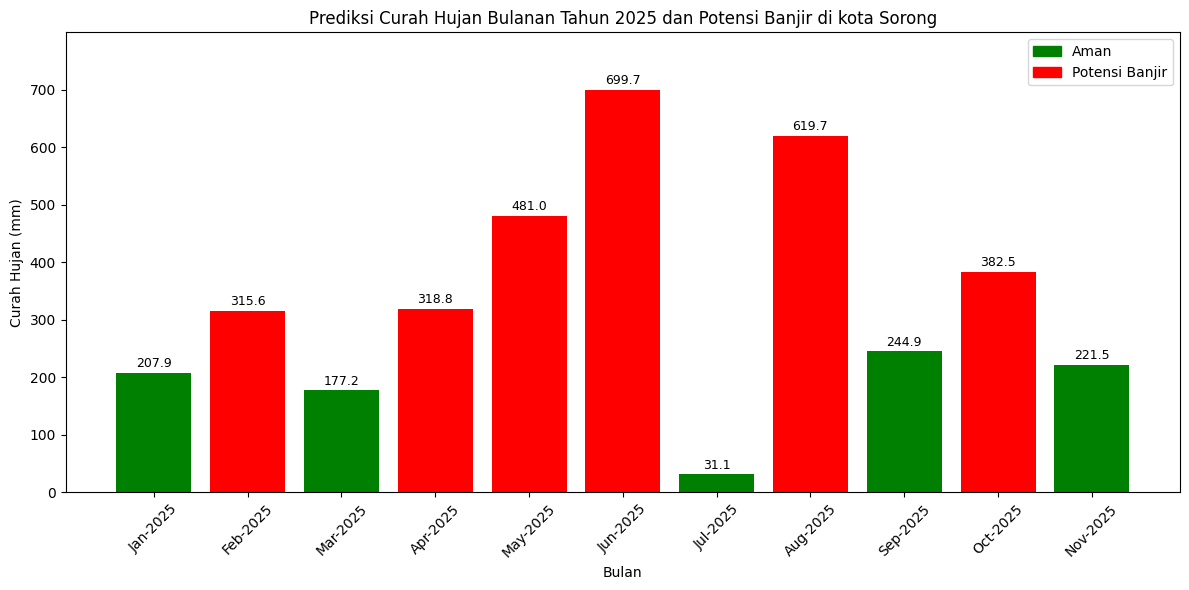

In [15]:
# Membuat warna berdasarkan status
colors = pred_2025["Status"].map({"Potensi Banjir": "red", "Aman": "green"})

plt.figure(figsize=(12,6))
bars = plt.bar(pred_2025["ds"].dt.strftime("%b-%Y"), pred_2025["yhat"], color=colors)

# Menambahkan label di atas bar
for bar in bars:
    yval = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        yval + 5,
        f"{yval:.1f}",
        ha="center",
        va="bottom",
        fontsize=9
    )

plt.title("Prediksi Curah Hujan Bulanan Tahun 2025 dan Potensi Banjir di kota Sorong")
plt.xlabel("Bulan")
plt.ylabel("Curah Hujan (mm)")
plt.xticks(rotation=45)
plt.ylim(0, pred_2025["yhat"].max() + 100)

# Legend manual
import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Potensi Banjir')
green_patch = mpatches.Patch(color='green', label='Aman')
plt.legend(handles=[green_patch, red_patch])

plt.tight_layout()
plt.show()